# World Happiness Report 2021: Exploratory Data Analysis
by: Farhad Zamani (https://github.com/farzamani)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

# Upload Data

In [2]:
raw = pd.read_csv('world-happiness-report.csv')
raw_2021 = pd.read_csv('world-happiness-report-2021.csv')

Datasets that I use is World Happiness Report 2021 which I get from Kaggle https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021. 

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Section 0: Check the Water: Simple exploration and a little cleaning

### Historical Data

In [3]:
raw.sample(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1523,Singapore,2008,6.642,11.178,0.845,74.20,0.661,0.046,0.066,0.721,0.256
946,Laos,2007,5.364,8.307,0.790,54.44,0.867,0.478,0.580,0.861,0.136
1382,Philippines,2008,4.589,8.634,0.798,60.20,0.861,0.083,0.817,0.805,0.384
837,Ivory Coast,2019,5.392,8.564,0.679,50.10,0.736,-0.017,0.799,0.674,0.425
1367,Peru,2007,5.214,9.063,0.756,65.58,0.638,-0.078,0.931,0.758,0.361


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
raw[raw.isna().any(axis=1)]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
66,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390,0.843,0.238
110,Bahrain,2012,5.027,10.716,0.911,66.86,0.682,NaN,0.438,0.589,0.381
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228
1917,Yemen,2017,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,0.455,0.295
1918,Yemen,2018,3.058,NaN,0.789,56.70,0.553,NaN,0.793,0.461,0.315


In [6]:
raw = raw.dropna() # remove rows that have null values

### 2021 Data

In [7]:
raw_2021.sample(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,South Korea,East Asia,5.845,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
108,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
33,Slovakia,Central and Eastern Europe,6.331,0.041,6.411,6.251,10.369,0.936,69.201,0.766,-0.124,0.911,2.43,1.304,1.066,0.653,0.468,0.107,0.018,2.714


In [8]:
raw_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## Merging Data

We will only take several columns which available in both datasets: Country, year, region, life ladder, log gdp per capita, social support, healthy life expectancy, freedom to make choices, and generosity, as well as perceptions of corruption.

Then, we will merge both datasets into one. Also, we can rename the column name for convenient.

In [9]:
raw_2021.rename(columns={'Country name': 'country', 
                         'Regional indicator': 'region', 
                         'Ladder score':'score',
                         'Perceptions of corruption': 'corruption',
                         'Healthy life expectancy': 'health',
                         'Social support': 'social',
                         'Freedom to make life choices': 'freedom',
                         'Generosity': 'generosity',
                         'Logged GDP per capita':'gdp'}, inplace=True)

raw_2021 = raw_2021.drop(['Standard error of ladder score','upperwhisker', 'lowerwhisker','Ladder score in Dystopia',
               'Explained by: Log GDP per capita', 'Explained by: Social support',
               'Explained by: Healthy life expectancy',
               'Explained by: Freedom to make life choices',
               'Explained by: Generosity', 'Explained by: Perceptions of corruption',
               'Dystopia + residual'], axis=1)

raw.rename(columns={'Country name': 'country', 
                    'Log GDP per capita':'gdp', 
                    'Life Ladder':'score', 
                    'Social support': 'social',
                    'Healthy life expectancy at birth': 'health',
                    'Freedom to make life choices':'freedom',
                    'Generosity': 'generosity',
                    'Perceptions of corruption':'corruption'}, inplace=True)

raw = raw.drop(['Positive affect','Negative affect'], axis=1)

In [10]:
raw = raw.reset_index(drop=True)
raw_2021['year'] = 2021
region = raw_2021[['country', 'region']]

In [11]:
raw_region = pd.merge(raw, region, on ='country', how ='left')

In [12]:
df = pd.concat([raw_region, raw_2021], ignore_index=True)
df = df.sort_values(['year','score']).reset_index(drop=True)
df

,country,year,score,gdp,social,health,freedom,generosity,corruption,region
0,Canada,2005,7.418,10.652,0.962,71.30,0.957,0.256,0.503,North America and ANZ
1,Togo,2006,3.202,7.078,0.435,49.26,0.628,-0.007,0.850,Sub-Saharan Africa
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,Sub-Saharan Africa
3,Chad,2006,3.435,7.360,0.724,43.18,0.306,0.028,0.961,Sub-Saharan Africa
4,Sierra Leone,2006,3.628,7.136,0.561,40.30,0.679,0.101,0.836,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...
1852,Netherlands,2021,7.464,10.932,0.942,72.40,0.913,0.175,0.338,Western Europe
1853,Iceland,2021,7.554,10.878,0.983,73.00,0.955,0.160,0.673,Western Europe
1854,Switzerland,2021,7.571,11.117,0.942,74.40,0.919,0.025,0.292,Western Europe
1855,Denmark,2021,7.620,10.933,0.954,72.70,0.946,0.030,0.179,Western Europe


# Section 0.5: Data Cleaning and PreProcessing

In [13]:
df['year'] = df['year'].astype(object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1857 non-null   object 
 1   year        1857 non-null   object 
 2   score       1857 non-null   float64
 3   gdp         1857 non-null   float64
 4   social      1857 non-null   float64
 5   health      1857 non-null   float64
 6   freedom     1857 non-null   float64
 7   generosity  1857 non-null   float64
 8   corruption  1857 non-null   float64
 9   region      1812 non-null   object 
dtypes: float64(7), object(3)
memory usage: 145.2+ KB


We can remove rows that have null value.

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

country       0
year          0
score         0
gdp           0
social        0
health        0
freedom       0
generosity    0
corruption    0
region        0
dtype: int64

In [17]:
df['year'].value_counts()

2021    149
2017    129
2019    126
2018    126
2011    125
2015    124
2014    122
2016    122
2013    119
2012    116
2010    109
2009    101
2008     98
2007     91
2020     81
2006     73
2005      1
Name: year, dtype: int64

Because year 2005 only consist of one data, we can drop it.

In [18]:
df = df.drop(df[df['year'] == 2005].index)
df = df.reset_index(drop=True)

In [19]:
df.sample(10)

,country,year,score,gdp,social,health,freedom,generosity,corruption,region
1541,Romania,2019,6.130,10.306,0.842,67.500,0.848,-0.221,0.954,Central and Eastern Europe
774,Tunisia,2013,5.246,9.240,0.648,65.640,0.536,-0.207,0.886,Middle East and North Africa
15,Armenia,2006,4.289,9.044,0.682,64.800,0.520,-0.231,0.850,Commonwealth of Independent States
1291,Mauritius,2017,6.174,9.972,0.910,66.100,0.912,0.087,0.818,Sub-Saharan Africa
893,Croatia,2014,5.381,10.072,0.646,68.300,0.519,0.132,0.918,Central and Eastern Europe
1746,Moldova,2021,5.766,9.454,0.857,65.699,0.822,-0.079,0.918,Commonwealth of Independent States
416,Turkey,2010,5.490,9.906,0.795,64.400,0.515,-0.187,0.811,Middle East and North Africa
998,South Africa,2015,4.887,9.460,0.898,55.300,0.862,-0.127,0.853,Sub-Saharan Africa
978,Kenya,2015,4.358,8.249,0.777,58.300,0.793,0.221,0.853,Sub-Saharan Africa
1798,Germany,2021,7.155,10.873,0.903,72.500,0.875,0.011,0.460,Western Europe


## Make a standardized datasets, just in case.

In [20]:
df.columns

Index(['country', 'year', 'score', 'gdp', 'social', 'health', 'freedom',
       'generosity', 'corruption', 'region'],
      dtype='object')

In [21]:
from sklearn.preprocessing import RobustScaler

# make a copy of dataframe
df_std = df.copy()

col_names = ['score', 'gdp', 'social', 'health', 'freedom', 'generosity', 'corruption']
features = df_std[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

df_std[col_names] = features

In [22]:
df_std.sample(10)

,country,year,score,gdp,social,health,freedom,generosity,corruption,region
445,Argentina,2010,0.644472,0.316694,0.554878,0.193928,-0.174757,-0.477833,0.289773,Latin America and Caribbean
369,Bulgaria,2010,-0.900428,0.155126,0.042683,0.037218,-1.072816,-0.566502,0.778409,Central and Eastern Europe
307,South Africa,2009,-0.102627,-0.033280,0.250000,-1.512243,-0.131068,-0.615764,0.568182,Sub-Saharan Africa
1584,Cambodia,2020,-0.616371,-0.597960,-0.682927,-0.285994,0.956311,0.399015,0.335227,Southeast Asia
1302,Singapore,2017,0.605987,1.065486,0.371951,1.095005,0.776699,0.812808,-3.647727,Southeast Asia
883,Portugal,2014,-0.158216,0.455717,0.158537,0.615083,0.393204,-0.477833,0.778409,Western Europe
1795,Costa Rica,2021,1.028100,0.216855,0.335366,0.595495,0.815534,-0.477833,0.028409,Latin America and Caribbean
566,Czech Republic,2011,0.577276,0.514761,0.475610,0.285994,0.101942,-0.379310,0.829545,Central and Eastern Europe
949,Finland,2014,1.221136,0.664520,0.707317,0.591577,0.810680,0.137931,-3.062500,Western Europe
366,Mali,2010,-0.992059,-0.984434,-0.518293,-1.657199,-0.082524,0.004926,0.039773,Sub-Saharan Africa


Data is ready to be explored!

# Section 1: Simple EDA

## 1.1 Hypothesis

Before we start, let's make some hypothesis:

H0: No indicator contributed and explained the life ladder score. In other words, the indicator doesn't explain how countries percieve happiness.

To check our hypothesis, we could analyse the p-value. When the p-value is below 5% (0.05), we could say there is significant impact of the indicator and we can reject the H0.

## Estimation and Inference

Inferential Statistics consist in learning characteristics of the population from a sample. The population characteristics are parameters, while the sample characteristics are statistics. A parametric model, uses a certain number of parameters like mean and standard deviation.

The most common way of estimating parameters in a parametric model is through maximum likelihood estimation.

Through a hypothesis test, you test for a specific value of the parameter.

Estimation represents a process of determining a population parameter based on a model fitted to the data.

The most common distribution functions are: uniform, normal, log normal, exponential, and poisson.

A frequentist approach focuses in observing man repeats of an experiment. A bayesian approach describes parameters through probability distributions.

## Hypothesis Testing

A hypothesis is a statement about a population parameter. You commonly have two hypothesis: the null hypothesis and the alternative hypothesis.

A hypothesis test gives you a rule to decide for which values of the test statistic you accept the null hypothesis and for which values you reject the null hypothesis and accept he alternative hypothesis.

A type 1 error occurs when an effect is due to chance, but we find it to be significant in the model.

A type 2 error occurs when we ascribe the effect to chance, but the effect is non-coincidental.

## Significance level and p-values

A significance level is a probability threshold below which the null hypothesis can be rejected. You must choose the significance level before computing the test statistic. It is usually .01 or .05.

A p-value is the smallest significance level at which the null hypothesis would be rejected. The confidence interval contains the values of the statistic for which we accept the null hypothesis.

Correlations are useful as effects can help predict an outcome, but correlation does not imply causation.

When making recommendations, one should take into consideration confounding variables and the fact that correlation across two variables do not imply that an increase or decrease in one of them will drive an increase or decrease of the other.

Spurious correlations happen in data. They are just coincidences given a particular data sample.

## 1.2 Decribe, Corr, Cov 

In [42]:
df.describe()

,score,gdp,social,health,freedom,generosity,corruption
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,5.470724,9.353257,0.812282,63.553496,0.745728,-0.003251,0.748688
std,1.127501,1.148100,0.119466,7.561834,0.140488,0.161921,0.186560
min,2.375000,6.635000,0.291000,32.300000,0.258000,-0.335000,0.035000
25%,4.635500,8.447000,0.744000,58.690000,0.653000,-0.116000,0.695000
50%,5.386000,9.476000,0.836000,65.320000,0.766000,-0.029000,0.804000
75%,6.272500,10.310000,0.908000,68.900000,0.859000,0.087000,0.871000
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000


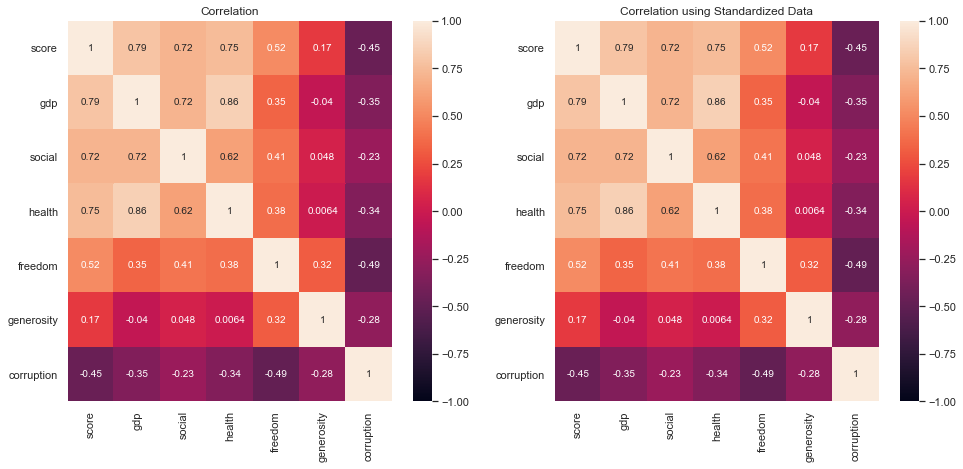

In [122]:
plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0)
plt.title('Correlation')

plt.subplot(1, 2, 2)
sns.heatmap(df_std.corr(), vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0)
plt.title('Correlation using Standardized Data')

plt.show()

It seems that normal data and standardized data don't have any differences. So we are gonna use only normal data.

## 1.3 P-Value Test

### 1.3.1 Historical Data

In [74]:
from scipy.stats import ttest_rel, pearsonr

corr_df = pd.DataFrame(columns=['r', 'p', 'p<0.05'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'score':
        r, p = pearsonr(df.score, df[col])
        corr_df.loc[col] = [r, p, p<0.05]
    
corr_df

,r,p,p<0.05
gdp,0.792491,0.000000e+00,True
social,0.716335,4.761671e-285,True
health,0.754642,0.000000e+00,True
freedom,0.520017,5.097396e-126,True
generosity,0.173073,1.205012e-13,True
corruption,-0.453912,9.657928e-93,True


The test shows that our null hypothesis could be rejected. Thus, the indicator contribute significant impact to the happiness data.

## 1.4 EDA: Historical Data

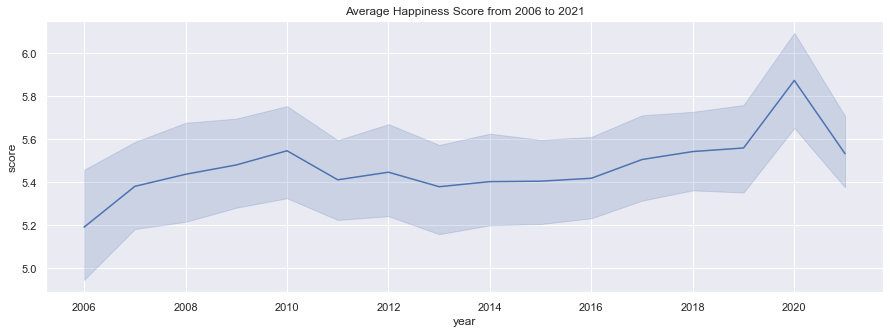

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='year', y='score')
plt.title('Average Happiness Score from 2006 to 2021')
plt.show()

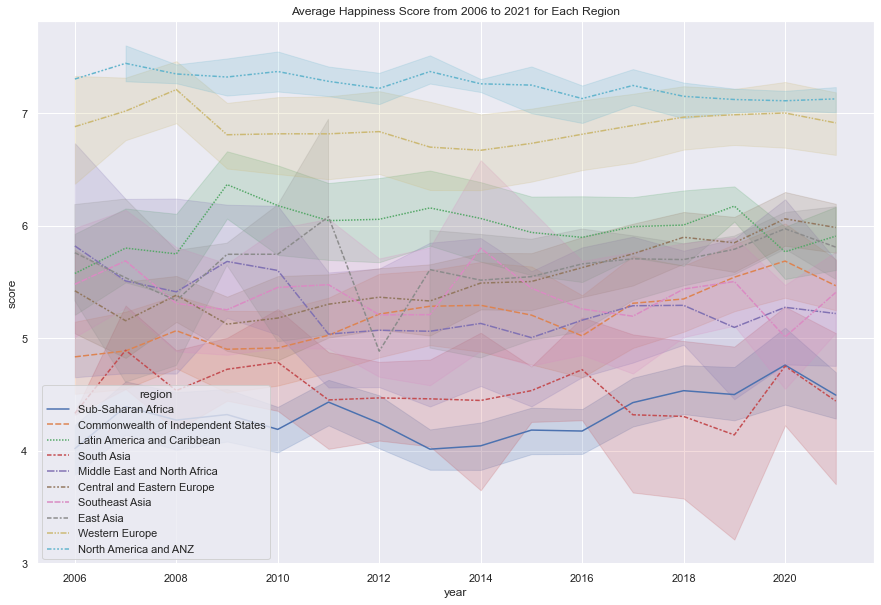

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='year', y='score', 
             hue='region', 
             style='region')
plt.title('Average Happiness Score from 2006 to 2021 for Each Region')
plt.show()

Take away:
1. The average happiness score of the world from 2006 to 2021 only shows a slight change over time, which peaked in 2020 with a score of around 5.9.
2. Region which have the highest happiness score over time is North America and ANZ, followed b Western Europe region, with average score over year above 7 and above 6.5 respectively. 
3. Sub-Saharan Africa and South Asia are two regions which have the lowest average happiness score from 2006 to 2021.

## 1.5 EDA: 2021 Data

In [26]:
df_2021 = df[df['year']==2021]

### 1.5.1 Corr Heatmap

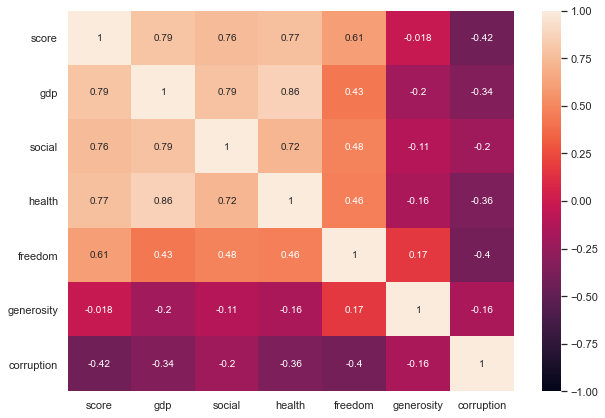

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df_2021.corr(), vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0)
plt.show()

Take away:

Several indicators, gdp, social support, healthy life expectancy, and freedom to make choices, show a positive correlaction with score. And perception to corruption indicator shows a negative correlation with score. Only generosity doesn't show any correlation with score.

### 1.5.2 Histogram and Boxplot Combination

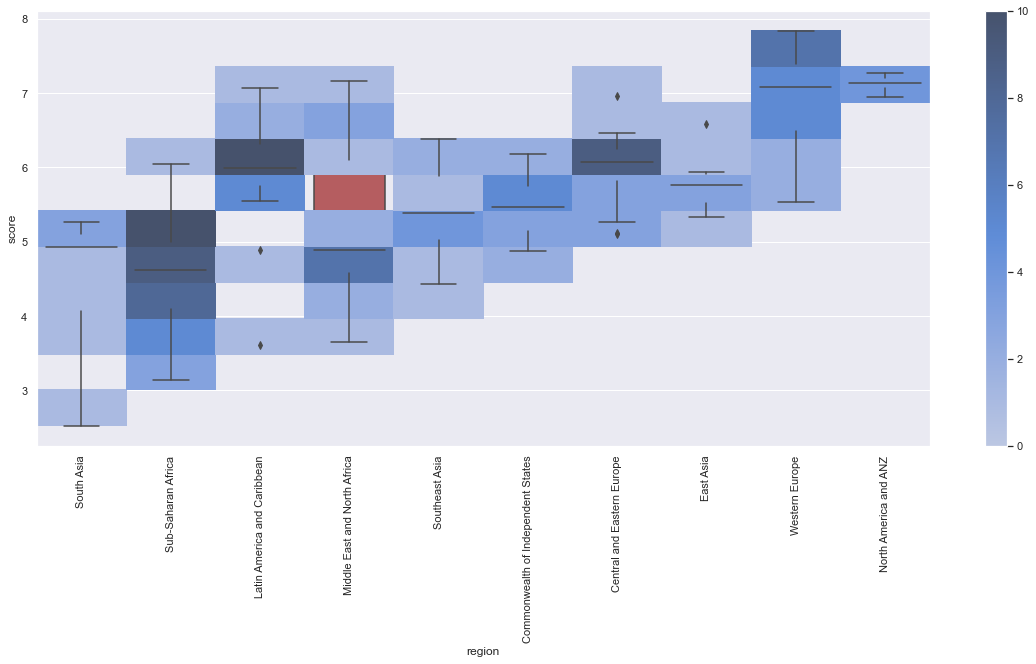

In [90]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_2021, x='region', y='score', cbar=True)
sns.boxplot(x="region", y="score", data=df_2021)
plt.xticks(rotation='90')
plt.show()

Take away:

Graph above shows the distubution of country in each region based on its score. Most of countries that have high happiness score is in western europe. On the other hand, the unhappiest country mostly is in sub-saharan africa. 

### 1.5.3 Pairplot all 2021 Data

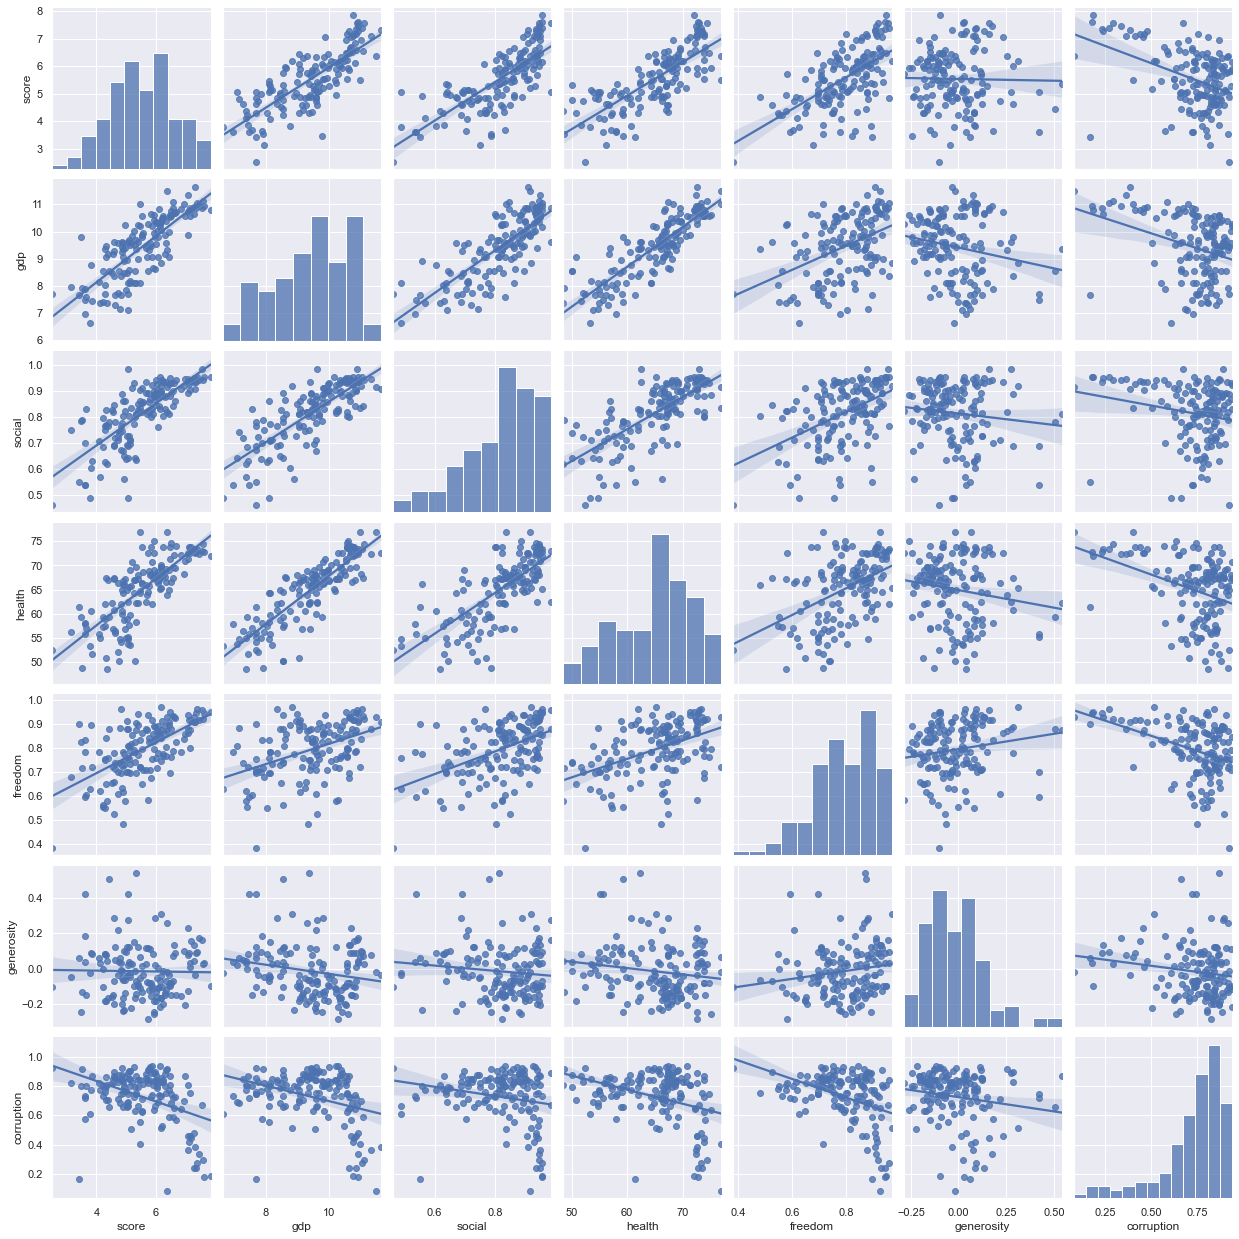

In [30]:
sns.pairplot(df_2021[['score', 'gdp', 'social', 'health', 'freedom','generosity', 'corruption']], kind='reg')
plt.show()

### 1.5.4 Scatter Plot: Score v.s. Indicators

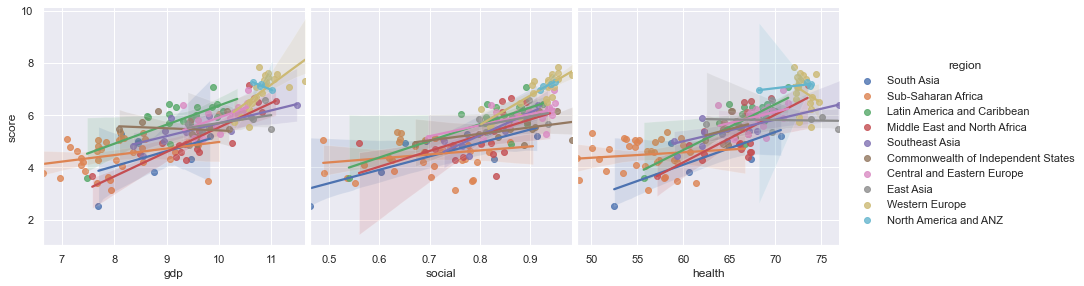

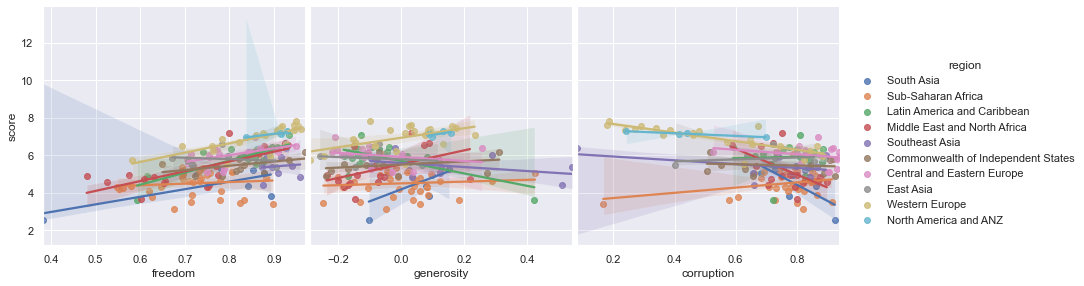

In [120]:
sns.pairplot(df_2021,
             y_vars=['score'],
             x_vars=['gdp', 'social', 'health'],
             hue='region',
             kind='reg',
             height=4)
sns.pairplot(df_2021,
             y_vars=['score'],
             x_vars=['freedom','generosity', 'corruption'],
             hue='region',
             kind='reg',
             height=4)
plt.show()

Take away:
Not every region has a similar indicator that leads to how they perceive happiness. We can look at the regression plot in every graphs, except gdp, which shows that each region has its own direction, and not always all positive or all negative.

# Section 2: More Exploration!

## 2.1 Comparing countries: top 5 and bottom 5 scores

In [31]:
top_country_2021 = df_2021.sort_values('score', ascending=False)[:5]
bottom_country_2021 = df_2021.sort_values('score', ascending=False)[-5:]
compare_2021 = top_country_2021.append(bottom_country_2021)

In [32]:
df_compare = df[df['country'].isin(compare_2021['country'].tolist())]

### 2.1.1 Pairplot of 2021 Data

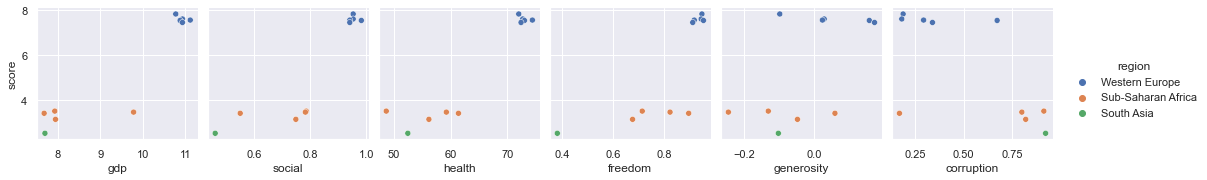

In [119]:
sns.pairplot(compare_2021,
             y_vars=['score'],
             x_vars=['gdp', 'social', 'health', 'freedom','generosity', 'corruption'],
             hue='region')
plt.show()

### 2.1.2 Historical Lineplot

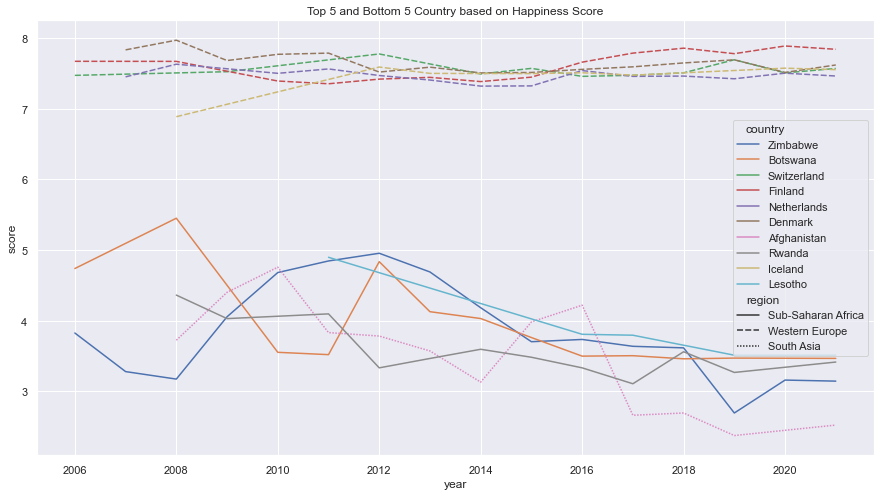

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_compare, x='year', y='score', 
             hue='country', style='region')
plt.title('Top 5 and Bottom 5 Country based on Happiness Score')
plt.show()

Take away: The top 5 countries with highest happiness score have a stable score over the time, which around 7 to 8. On the other hand, the bottom 5 countries have a slight decline in their happiness score from 2006 to 2021.

# Section 3: Conclusion; and What's Next?

From all of the data above, we know that most of countries that have high happiness score is in western europe. On the other hand, the unhappiest country mostly is in sub-saharan africa. Moreover, the gap of happiness score between the top 5 and the bottom 5 is getting wider through years.

The indicator that contribute a significant impact to happiness score is GDP, social support, healthy life expectancy, and freedom to make choices, which is showing a positive correlaction to happiness score.